# Data preprocessing


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('Premier_League.csv')


In [ ]:
data.iloc[1, :]

,1
date,28th May 2023
clock,4:30pm
stadium,Villa Park
attendance,"42,212"
Home Team,Aston Villa
Goals Home,2
Away Team,Brighton and Hove Albion
Away Goals,1
home_possessions,40.3
away_possessions,59.7


In [ ]:
data.columns

Index(['date', 'clock', 'stadium', 'attendance', 'Home Team', 'Goals Home',
       'Away Team', 'Away Goals', 'home_possessions', 'away_possessions',
       'home_shots', 'away_shots', 'home_on', 'away_on', 'home_off',
       'away_off', 'home_blocked', 'away_blocked', 'home_pass', 'away_pass',
       'home_chances', 'away_chances', 'home_corners', 'away_corners',
       'home_offside', 'away_offside', 'home_tackles', 'away_tackles',
       'home_duels', 'away_duels', 'home_saves', 'away_saves', 'home_fouls',
       'away_fouls', 'home_yellow', 'away_yellow', 'home_red', 'away_red',
       'links'],
      dtype='object')

### Data preprocessing
##### Data collected after the match cannot be used for predicting results. So, let's get rid of some columns

In [ ]:
columns_to_drop = [  'home_on', 'away_on', 'home_off',
       'away_off', 'home_blocked', 'away_blocked', 'home_corners', 'away_corners','home_offside', 'away_offside', 'home_tackles', 'away_tackles',
       'home_duels', 'away_duels', 'home_saves', 'away_saves', 'home_fouls',
       'away_fouls', 'home_yellow', 'away_yellow', 'home_red', 'away_red',
       'links' ]

data_dropped = data.drop(columns=columns_to_drop)


In [ ]:
data_dropped.columns

Index(['date', 'clock', 'stadium', 'attendance', 'Home Team', 'Goals Home',
       'Away Team', 'Away Goals', 'home_possessions', 'away_possessions',
       'home_shots', 'away_shots', 'home_pass', 'away_pass', 'home_chances',
       'away_chances'],
      dtype='object')

In [ ]:
data_dropped.iloc[1, :]

,1
date,28th May 2023
clock,4:30pm
stadium,Villa Park
attendance,"42,212"
Home Team,Aston Villa
Goals Home,2
Away Team,Brighton and Hove Albion
Away Goals,1
home_possessions,40.3
away_possessions,59.7


#### Now, let's create the match result using the 'Goals Home' and 'Away Goals' columns

In [ ]:

def get_result(row):
  if row['Goals Home'] > row['Away Goals']:
    return 'Win'
  elif row['Goals Home'] == row['Away Goals']:
    return 'Tie'
  else:
    return 'Loss'

data_dropped['Home Result'] = data_dropped.apply(get_result, axis=1)


In [ ]:
data_dropped.iloc[1, :]

,1
date,28th May 2023
clock,4:30pm
stadium,Villa Park
attendance,"42,212"
Home Team,Aston Villa
Goals Home,2
Away Team,Brighton and Hove Albion
Away Goals,1
home_possessions,40.3
away_possessions,59.7


### We will now categorically encode our home and away team variables.

In [ ]:
home_teams = data_dropped['Home Team'].unique()
home_teams

array(['Arsenal', 'Aston Villa', 'Brentford', 'Chelsea', 'Crystal Palace',
       'Everton', 'Leeds United', 'Leicester City', 'Manchester United',
       'Southampton', 'Brighton and Hove Albion', 'Newcastle United',
       'West Ham United', 'Manchester City', 'Tottenham Hotspur',
       'Bournemouth', 'Fulham', 'Liverpool', 'Wolverhampton Wanderers',
       'Nottingham Forest'], dtype=object)

In [ ]:
away_teams = data_dropped['Away Team'].unique()
away_teams

array(['Wolverhampton Wanderers', 'Brighton and Hove Albion',
       'Manchester City', 'Newcastle United', 'Nottingham Forest',
       'Bournemouth', 'Tottenham Hotspur', 'West Ham United', 'Fulham',
       'Liverpool', 'Chelsea', 'Leicester City', 'Leeds United',
       'Southampton', 'Brentford', 'Manchester United', 'Crystal Palace',
       'Aston Villa', 'Everton', 'Arsenal'], dtype=object)

### We cannot simply apply encoding to both home_teams and away_teams, since they have some common teams. Let us find these common teams

In [ ]:
# prompt: find common teams in home_teams and away_teams

common_teams = set(home_teams).intersection(set(away_teams))
common_teams


{'Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brentford',
 'Brighton and Hove Albion',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Leeds United',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Nottingham Forest',
 'Southampton',
 'Tottenham Hotspur',
 'West Ham United',
 'Wolverhampton Wanderers'}

### We need to encode the two variables such that teams present in both home_teams and away_teams get the same label, and not different

In [ ]:

all_teams = set(home_teams).union(set(away_teams))
team_to_label = {team: i for i, team in enumerate(all_teams)}

data_dropped['Home Team Label'] = data_dropped['Home Team'].map(team_to_label)
data_dropped['Away Team Label'] = data_dropped['Away Team'].map(team_to_label)


In [ ]:

print(data_dropped[['Home Team Label', 'Home Team', 'Away Team Label', 'Away Team']].head(15).to_string(index=False))


 Home Team Label                Home Team  Away Team Label                Away Team
               5                  Arsenal               18  Wolverhampton Wanderers
               4              Aston Villa               14 Brighton and Hove Albion
               8                Brentford               12          Manchester City
              16                  Chelsea               11         Newcastle United
               3           Crystal Palace                6        Nottingham Forest
               2                  Everton               10              Bournemouth
               7             Leeds United               15        Tottenham Hotspur
               1           Leicester City               13          West Ham United
               9        Manchester United               17                   Fulham
               0              Southampton               19                Liverpool
               9        Manchester United               16                  

#### As we can see with teams present in both Home and Away columns, such as Chelsea(0), Leicester City(16), Brighton and Hove Albion(7), labeling has been done accurately

In [ ]:
# prompt: print first record

print(data_dropped.iloc[0].to_string())


date                          28th May 2023
clock                                4:30pm
stadium                    Emirates Stadium
attendance                           60,095
Home Team                           Arsenal
Goals Home                                5
Away Team           Wolverhampton Wanderers
Away Goals                                0
home_possessions                       51.0
away_possessions                       49.0
home_shots                               14
away_shots                                6
home_pass                              89.0
away_pass                              88.0
home_chances                              3
away_chances                              0
Home Result                             Win
Home Team Label                           5
Away Team Label                          18


### Stadium encoding

In [ ]:
data_dropped['stadium'].unique()

array(['Emirates Stadium', 'Villa Park', 'Gtech Community Stadium',
       'Stamford Bridge', 'Selhurst Park', 'Goodison Park', 'Elland Road',
       'The King Power Stadium', 'Old Trafford', "St. Mary's Stadium",
       'Amex Stadium', "St James' Park, Newcastle", 'London Stadium',
       'Etihad Stadium', 'Tottenham Hotspur Stadium', 'Vitality Stadium',
       'Craven Cottage', 'Anfield', 'Molineux', 'The City Ground', 'Nan'],
      dtype=object)

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_dropped['stadium_encoded'] = le.fit_transform(data_dropped['stadium'])

print(data_dropped[['stadium', 'stadium_encoded']].head(25).to_string(index=False))


                  stadium  stadium_encoded
         Emirates Stadium                4
               Villa Park               19
  Gtech Community Stadium                7
          Stamford Bridge               15
            Selhurst Park               12
            Goodison Park                6
              Elland Road                3
   The King Power Stadium               17
             Old Trafford               11
       St. Mary's Stadium               14
             Old Trafford               11
             Amex Stadium                0
St James' Park, Newcastle               13
           London Stadium                8
             Amex Stadium                0
           Etihad Stadium                5
Tottenham Hotspur Stadium               18
         Vitality Stadium               20
           Craven Cottage                2
                  Anfield                1
                 Molineux                9
          The City Ground               16
St James' P

In [ ]:
print(data_dropped.iloc[0].to_string())

date                          28th May 2023
clock                                4:30pm
stadium                    Emirates Stadium
attendance                           60,095
Home Team                           Arsenal
Goals Home                                5
Away Team           Wolverhampton Wanderers
Away Goals                                0
home_possessions                       51.0
away_possessions                       49.0
home_shots                               14
away_shots                                6
home_pass                              89.0
away_pass                              88.0
home_chances                              3
away_chances                              0
Home Result                             Win
Home Team Label                           5
Away Team Label                          18
stadium_encoded                           4


In [ ]:
# Convert 'attendance' column to integer, handling potential non-numeric values
data_dropped['attendance'] = pd.to_numeric(data_dropped['attendance'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

data_dropped.iloc[0]

,0
date,28th May 2023
clock,4:30pm
stadium,Emirates Stadium
attendance,60095
Home Team,Arsenal
Goals Home,5
Away Team,Wolverhampton Wanderers
Away Goals,0
home_possessions,51.0
away_possessions,49.0


## Let's see attendance stats


In [ ]:

# Calculate and print attendance statistics
attendance_stats = data_dropped['attendance'].describe()
print("Attendance Statistics:")
print(attendance_stats)

# Calculate and print median attendance
median_attendance = data_dropped['attendance'].median()
print("\nMedian Attendance:", median_attendance)

# Calculate and print mode attendance (most frequent attendance value)
mode_attendance = data_dropped['attendance'].mode()[0] if not data_dropped['attendance'].mode().empty else "No mode found"
print("\nMode Attendance:", mode_attendance)

# Calculate and print the range of attendance
range_attendance = data_dropped['attendance'].max() - data_dropped['attendance'].min()
print("\nRange of Attendance:", range_attendance)


# Calculate and print the variance of attendance
variance_attendance = data_dropped['attendance'].var()
print("\nVariance of Attendance:", variance_attendance)

# Calculate and print the standard deviation of attendance
std_attendance = data_dropped['attendance'].std()
print("\nStandard Deviation of Attendance:", std_attendance)


Attendance Statistics:
count      380.000000
mean     39669.876316
std      16837.705747
min          0.000000
25%      29359.750000
50%      36880.000000
75%      53283.000000
max      75546.000000
Name: attendance, dtype: float64

Median Attendance: 36880.0

Mode Attendance: 0

Range of Attendance: 75546

Variance of Attendance: 283508334.8210734

Standard Deviation of Attendance: 16837.70574695595


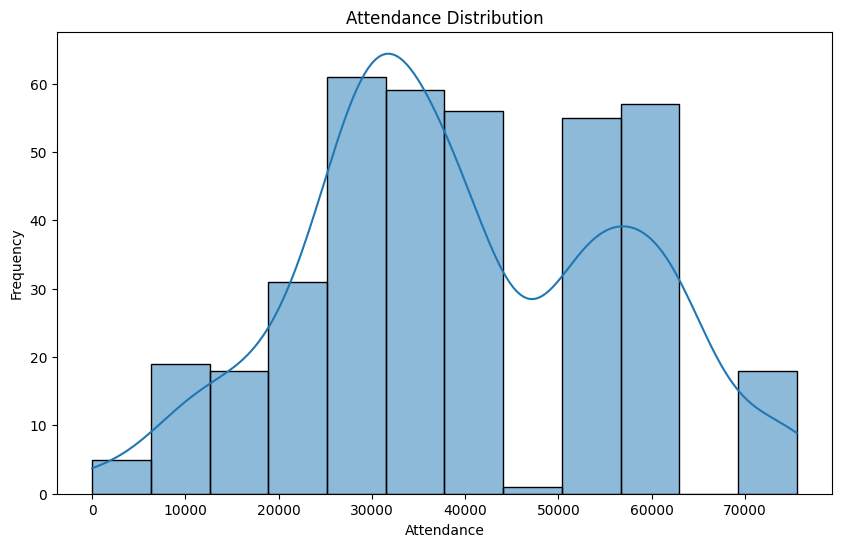

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the attendance distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_dropped['attendance'], kde=True)  # kde=True plots a curve
plt.title('Attendance Distribution')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()


In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Assuming 'attendance' is the column you want to scale
scaler = MinMaxScaler()
data_dropped['attendance_scaled'] = scaler.fit_transform(data_dropped[['attendance']])

# Print the scaled attendance values
print(data_dropped[['attendance', 'attendance_scaled']].head(10))


   attendance  attendance_scaled
0       60095           0.795476
1       42212           0.558759
2       17120           0.226617
3       40130           0.531200
4       25198           0.333545
5       39201           0.518902
6       36871           0.488060
7       32183           0.426005
8       73465           0.972454
9       31129           0.412054


In [ ]:
# Lets drop the home and away goals now that we have result, as well as attendance and stadium
data_dropped = data_dropped.drop(columns=['Goals Home', 'Away Goals', 'attendance', 'stadium'])


In [ ]:
print(data_dropped.iloc[:10, :].to_string())

            date   clock          Home Team                 Away Team  home_possessions  away_possessions  home_shots  away_shots  home_pass  away_pass  home_chances  away_chances Home Result  Home Team Label  Away Team Label  stadium_encoded  attendance_scaled
0  28th May 2023  4:30pm            Arsenal   Wolverhampton Wanderers              51.0              49.0          14           6       89.0       88.0             3             0         Win                5               18                4           0.795476
1  28th May 2023  4:30pm        Aston Villa  Brighton and Hove Albion              40.3              59.7          12           8       75.3       83.6             4             3         Win                4               14               19           0.558759
2  28th May 2023  4:30pm          Brentford           Manchester City              34.4              65.6          11          17       79.3       89.8             2             1         Win                8      

### Adding last 5 matches (recent form) to the data

In [ ]:
import pandas as pd
import re

# Function to remove ordinal suffixes (st, nd, rd, th) from date strings
def clean_date(date_str):
    # Remove st, nd, rd, th from the date string
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Function to infer away team result from home team result
def get_away_result(home_result):
    if home_result == 'Win':
        return 'Loss'
    elif home_result == 'Tie':
        return 'Tie'
    elif home_result == 'Loss':
        return 'Win'
    return None

# Function to calculate points from a result
def get_points(result):
    if result == 'Win':
        return 3
    elif result == 'Tie':
        return 1
    elif result == 'Loss':
        return 0
    return 0

# Function to compute points from last 5 matches for a team
def compute_last_5_points(team_label, match_index, df, team_col, result_col):
    # Get all prior matches for the team (home or away) before the current match
    prior_matches = df.iloc[:match_index]
    team_matches = prior_matches[
        (prior_matches['Home Team Label'] == team_label) |
        (prior_matches['Away Team Label'] == team_label)
    ]

    # Sort by index to ensure chronological order (assuming dataset is ordered by date)
    team_matches = team_matches.sort_index(ascending=False)

    # Limit to last 5 matches
    team_matches = team_matches.head(5)

    points = 0
    for _, row in team_matches.iterrows():
        if row['Home Team Label'] == team_label:
            # Team was home
            points += get_points(row['Home Result'])
        else:
            # Team was away
            points += get_points(get_away_result(row['Home Result']))

    return points

# Main function to add new columns
def add_last_5_points_columns(df):
    # Create new columns
    df['Home_Team_Last_5_Points'] = 0
    df['Away_Team_Last_5_Points'] = 0

    # Clean the date column to remove ordinal suffixes
    df['date_cleaned'] = df['date'].apply(clean_date)

    # Convert cleaned date to datetime
    df['date_cleaned'] = pd.to_datetime(df['date_cleaned'], format='%d %B %Y', errors='coerce')

    # Check for any parsing errors
    if df['date_cleaned'].isna().any():
        print("Warning: Some dates could not be parsed. Check the following rows:")
        print(df[df['date_cleaned'].isna()][['date', 'date_cleaned']])

    # Sort by cleaned date to ensure chronological order
    df = df.sort_values(by='date_cleaned').reset_index(drop=True)

    # Iterate through each match
    for idx in range(len(df)):
        home_team = df.loc[idx, 'Home Team Label']
        away_team = df.loc[idx, 'Away Team Label']

        # Compute points for home and away teams
        df.loc[idx, 'Home_Team_Last_5_Points'] = compute_last_5_points(
            home_team, idx, df, 'Home Team Label', 'Home Result'
        )
        df.loc[idx, 'Away_Team_Last_5_Points'] = compute_last_5_points(
            away_team, idx, df, 'Away Team Label', 'Home Result'
        )

    # Drop the temporary cleaned date column (optional)
    df = df.drop(columns=['date_cleaned'])

    return df

# Example usage
# Assuming your DataFrame is called data_dropped
data_dropped = add_last_5_points_columns(data_dropped)



In [ ]:
# Display the first 10 rows to verify
print(data_dropped.iloc[90:100, :].to_string())

                 date   clock                 Home Team                Away Team  home_possessions  away_possessions  home_shots  away_shots  home_pass  away_pass  home_chances  away_chances Home Result  Home Team Label  Away Team Label  stadium_encoded  attendance_scaled  Home_Team_Last_5_Points  Away_Team_Last_5_Points
90  15th October 2022  3:00pm                    Fulham              Bournemouth              68.9              31.1          19          10       84.8       69.8             0             2         Tie               17               10                2           0.303299                        6                        9
91  15th October 2022  12:30p            Leicester City           Crystal Palace              53.1              46.9          14           8       85.1       82.9             1             0         Tie                1                3               17           0.414291                        3                        5
92  16th October 2022  2:00pm  

In [ ]:
data_with_last_five_form = data_dropped.copy()


In [ ]:

data_with_last_five_form.to_csv('data_with_last_five_form.csv', index=False)


In [ ]:
new_data = pd.read_csv('data_with_last_five_form.csv')

In [ ]:
# prompt: # Let's scale the two columns Home_Team_Last_5_Points  Away_Team_Last_5_Points

# Assuming 'data_with_last_five_form' is your DataFrame

# Import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the specified columns
new_data[['Home_Team_Last_5_Points_Scaled', 'Away_Team_Last_5_Points_Scaled']] = scaler.fit_transform(new_data[['Home_Team_Last_5_Points', 'Away_Team_Last_5_Points']])

# Display the first few rows to verify the scaling
print(new_data[['Home_Team_Last_5_Points', 'Home_Team_Last_5_Points_Scaled', 'Away_Team_Last_5_Points', 'Away_Team_Last_5_Points_Scaled']].iloc[90:100, :])


    Home_Team_Last_5_Points  Home_Team_Last_5_Points_Scaled  \
90                        6                        0.400000   
91                        3                        0.200000   
92                        6                        0.400000   
93                        2                        0.133333   
94                        3                        0.200000   
95                        8                        0.533333   
96                       12                        0.800000   
97                        6                        0.400000   
98                        4                        0.266667   
99                       10                        0.666667   

    Away_Team_Last_5_Points  Away_Team_Last_5_Points_Scaled  
90                        9                        0.600000  
91                        5                        0.333333  
92                       12                        0.800000  
93                       12                        0.80000

In [ ]:
print(new_data.iloc[90, :].to_string())

date                              15th October 2022
clock                                        3:00pm
Home Team                                    Fulham
Away Team                               Bournemouth
home_possessions                               68.9
away_possessions                               31.1
home_shots                                       19
away_shots                                       10
home_pass                                      84.8
away_pass                                      69.8
home_chances                                      0
away_chances                                      2
Home Result                                     Tie
Home Team Label                                  17
Away Team Label                                  10
stadium_encoded                                   2
attendance_scaled                          0.303299
Home_Team_Last_5_Points                           6
Away_Team_Last_5_Points                           9
Home_Team_La

In [ ]:
import pandas as pd
import re

# Function to remove ordinal suffixes from date strings
def clean_date(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Function to compute season average possession for a team
def compute_season_avg_possession(team_label, match_index, df):
    # Get all prior matches in the season before the current match
    prior_matches = df.iloc[:match_index]

    # Filter matches where the team was home or away
    team_matches = prior_matches[
        (prior_matches['Home Team Label'] == team_label) |
        (prior_matches['Away Team Label'] == team_label)
    ]

    # Extract possession values
    possession = []
    for _, row in team_matches.iterrows():
        if row['Home Team Label'] == team_label:
            possession.append(row['home_possessions'])
        else:
            possession.append(row['away_possessions'])

    # Compute average possession; return 50.0 if no prior matches
    return sum(possession) / len(possession) if possession else 50.0

# Main function to add season average possession columns
def add_season_avg_possession_columns(df):
    # Create new columns
    df['Home_Team_Season_Avg_Possession'] = 0.0
    df['Away_Team_Season_Avg_Possession'] = 0.0

    # Clean and parse dates
    df['date_cleaned'] = df['date'].apply(clean_date)
    df['date_cleaned'] = pd.to_datetime(df['date_cleaned'], format='%d %B %Y', errors='coerce')

    # Check for unparseable dates
    if df['date_cleaned'].isna().any():
        print("Warning: Unparseable dates found:")
        print(df[df['date_cleaned'].isna()][['date', 'date_cleaned']])

    # Sort by date to ensure chronological order
    df = df.sort_values(by='date_cleaned').reset_index(drop=True)

    # Compute season average possession for each match
    for idx in range(len(df)):
        home_team = df.loc[idx, 'Home Team Label']
        away_team = df.loc[idx, 'Away Team Label']

        df.loc[idx, 'Home_Team_Season_Avg_Possession'] = compute_season_avg_possession(
            home_team, idx, df
        )
        df.loc[idx, 'Away_Team_Season_Avg_Possession'] = compute_season_avg_possession(
            away_team, idx, df
        )

    # Drop temporary cleaned date column
    df = df.drop(columns=['date_cleaned'])

    return df

# Example usage
# Assuming your DataFrame is called new_data
new_data = add_season_avg_possession_columns(new_data)

# Display row 90 to verify
print(new_data.iloc[90, :].to_string())

date                               15th October 2022
clock                                         3:00pm
Home Team                                     Fulham
Away Team                                Bournemouth
home_possessions                                68.9
away_possessions                                31.1
home_shots                                        19
away_shots                                        10
home_pass                                       84.8
away_pass                                       69.8
home_chances                                       0
away_chances                                       2
Home Result                                      Tie
Home Team Label                                   17
Away Team Label                                   10
stadium_encoded                                    2
attendance_scaled                           0.303299
Home_Team_Last_5_Points                            6
Away_Team_Last_5_Points                       

In [ ]:
import pandas as pd
import re

# Function to remove ordinal suffixes from date strings
def clean_date(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Function to compute season average for a specific metric
def compute_season_avg_metric(team_label, match_index, df, metric):
    # Get all prior matches in the season before the current match
    prior_matches = df.iloc[:match_index]

    # Filter matches where the team was home or away
    team_matches = prior_matches[
        (prior_matches['Home Team Label'] == team_label) |
        (prior_matches['Away Team Label'] == team_label)
    ]

    # Extract metric values
    values = []
    for _, row in team_matches.iterrows():
        if row['Home Team Label'] == team_label:
            values.append(row[f'home_{metric}'])
        else:
            values.append(row[f'away_{metric}'])

    # Compute average; return default if no prior matches
    if not values:
        return 50.0 if metric == 'pass' else 0.0
    return sum(values) / len(values)

# Main function to add season average columns for shots, passes, and chances
def add_season_avg_features(df):
    # Create new columns
    metrics = ['shots', 'pass', 'chances']
    for metric in metrics:
        df[f'Home_Team_Season_Avg_{metric.capitalize()}'] = 0.0
        df[f'Away_Team_Season_Avg_{metric.capitalize()}'] = 0.0

    # Clean and parse dates
    df['date_cleaned'] = df['date'].apply(clean_date)
    df['date_cleaned'] = pd.to_datetime(df['date_cleaned'], format='%d %B %Y', errors='coerce')

    # Check for unparseable dates
    if df['date_cleaned'].isna().any():
        print("Warning: Unparseable dates found:")
        print(df[df['date_cleaned'].isna()][['date', 'date_cleaned']])

    # Sort by date to ensure chronological order
    df = df.sort_values(by='date_cleaned').reset_index(drop=True)

    # Compute season averages for each match
    for idx in range(len(df)):
        home_team = df.loc[idx, 'Home Team Label']
        away_team = df.loc[idx, 'Away Team Label']

        for metric in metrics:
            df.loc[idx, f'Home_Team_Season_Avg_{metric.capitalize()}'] = compute_season_avg_metric(
                home_team, idx, df, metric
            )
            df.loc[idx, f'Away_Team_Season_Avg_{metric.capitalize()}'] = compute_season_avg_metric(
                away_team, idx, df, metric
            )

    # Drop temporary cleaned date column
    df = df.drop(columns=['date_cleaned'])

    return df

# Example usage
# Assuming your DataFrame is called new_data
new_data = add_season_avg_features(new_data)

# Display row 90 to verify
print(new_data.iloc[90, :].to_string())

date                               15th October 2022
clock                                         3:00pm
Home Team                                     Fulham
Away Team                                Bournemouth
home_possessions                                68.9
away_possessions                                31.1
home_shots                                        19
away_shots                                        10
home_pass                                       84.8
away_pass                                       69.8
home_chances                                       0
away_chances                                       2
Home Result                                      Tie
Home Team Label                                   17
Away Team Label                                   10
stadium_encoded                                    2
attendance_scaled                           0.303299
Home_Team_Last_5_Points                            6
Away_Team_Last_5_Points                       

In [ ]:

columns_to_drop = ['home_possessions', 'away_possessions', 'home_shots', 'away_shots', 'home_pass', 'away_pass', 'home_chances', 'away_chances', 'Home_Team_Last_5_Points','Away_Team_Last_5_Points' ]
new_data = new_data.drop(columns=columns_to_drop)
print(new_data.iloc[90, :].to_string())


date                               15th October 2022
clock                                         3:00pm
Home Team                                     Fulham
Away Team                                Bournemouth
Home Result                                      Tie
Home Team Label                                   17
Away Team Label                                   10
stadium_encoded                                    2
attendance_scaled                           0.303299
Home_Team_Last_5_Points_Scaled                   0.4
Away_Team_Last_5_Points_Scaled                   0.6
Home_Team_Season_Avg_Possession            41.444444
Away_Team_Season_Avg_Possession            37.255556
Home_Team_Season_Avg_Shots                 10.222222
Away_Team_Season_Avg_Shots                  6.777778
Home_Team_Season_Avg_Pass                  73.188889
Away_Team_Season_Avg_Pass                  76.322222
Home_Team_Season_Avg_Chances                0.888889
Away_Team_Season_Avg_Chances                0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Specify the columns to scale
columns_to_scale = [
    'Home_Team_Season_Avg_Possession',
    'Away_Team_Season_Avg_Possession',
    'Home_Team_Season_Avg_Shots',
    'Away_Team_Season_Avg_Shots',
    'Home_Team_Season_Avg_Pass',
    'Away_Team_Season_Avg_Pass',
    'Home_Team_Season_Avg_Chances',
    'Away_Team_Season_Avg_Chances'
]

# Create new scaled columns
scaled_columns = [col + '_Scaled' for col in columns_to_scale]
new_data[scaled_columns] = scaler.fit_transform(new_data[columns_to_scale])

# Drop the original unscaled columns
new_data = new_data.drop(columns=columns_to_scale)

# Print row 90 to verify
print(new_data.iloc[90, :].to_string())

date                                      15th October 2022
clock                                                3:00pm
Home Team                                            Fulham
Away Team                                       Bournemouth
Home Result                                             Tie
Home Team Label                                          17
Away Team Label                                          10
stadium_encoded                                           2
attendance_scaled                                  0.303299
Home_Team_Last_5_Points_Scaled                          0.4
Away_Team_Last_5_Points_Scaled                          0.6
Home_Team_Season_Avg_Possession_Scaled             0.182778
Away_Team_Season_Avg_Possession_Scaled             0.266713
Home_Team_Season_Avg_Shots_Scaled                  0.524217
Away_Team_Season_Avg_Shots_Scaled                  0.294686
Home_Team_Season_Avg_Pass_Scaled                   0.540534
Away_Team_Season_Avg_Pass_Scaled        

Now, let's calculate the rest days, days between matches for each team


In [ ]:
import pandas as pd
import re
from datetime import timedelta

# Function to remove ordinal suffixes from date strings
def clean_date(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Function to compute days since last match for a team
def compute_rest_days(team_label, match_index, current_date, df):
    # Get all prior matches before the current match
    prior_matches = df.iloc[:match_index]

    # Filter matches where the team was home or away
    team_matches = prior_matches[
        (prior_matches['Home Team Label'] == team_label) |
        (prior_matches['Away Team Label'] == team_label)
    ]

    # If no prior matches, return default rest days (e.g., 14 days)
    if team_matches.empty:
        return 14.0

    # Get the most recent match date
    last_match_date = team_matches['date_cleaned'].max()

    # Calculate days difference
    rest_days = (current_date - last_match_date).days

    return float(rest_days)

# Main function to add rest days columns
def add_rest_days_columns(df):
    # Create new columns
    df['Rest_Days_Home'] = 0.0
    df['Rest_Days_Away'] = 0.0

    # Clean and parse dates
    df['date_cleaned'] = df['date'].apply(clean_date)
    df['date_cleaned'] = pd.to_datetime(df['date_cleaned'], format='%d %B %Y', errors='coerce')

    # Check for unparseable dates
    if df['date_cleaned'].isna().any():
        print("Warning: Unparseable dates found:")
        print(df[df['date_cleaned'].isna()][['date', 'date_cleaned']])
        # Optionally, handle NaT by filling with a default date or skipping
        df['date_cleaned'] = df['date_cleaned'].fillna(pd.Timestamp('2022-08-01'))

    # Sort by date to ensure chronological order
    df = df.sort_values(by='date_cleaned').reset_index(drop=True)

    # Compute rest days for each match
    for idx in range(len(df)):
        home_team = df.loc[idx, 'Home Team Label']
        away_team = df.loc[idx, 'Away Team Label']
        current_date = df.loc[idx, 'date_cleaned']

        df.loc[idx, 'Rest_Days_Home'] = compute_rest_days(
            home_team, idx, current_date, df
        )
        df.loc[idx, 'Rest_Days_Away'] = compute_rest_days(
            away_team, idx, current_date, df
        )

    # Drop temporary cleaned date column
    df = df.drop(columns=['date_cleaned'])

    return df

# Example usage
# Assuming your DataFrame is called new_data
new_data = add_rest_days_columns(new_data)



In [ ]:
# Display the sample record to verify
print(new_data.iloc[90, :].to_string())

date                                      15th October 2022
clock                                                3:00pm
Home Team                                            Fulham
Away Team                                       Bournemouth
Home Result                                             Tie
Home Team Label                                          17
Away Team Label                                          10
stadium_encoded                                           2
attendance_scaled                                  0.303299
Home_Team_Last_5_Points_Scaled                          0.4
Away_Team_Last_5_Points_Scaled                          0.6
Home_Team_Season_Avg_Possession_Scaled             0.182778
Away_Team_Season_Avg_Possession_Scaled             0.266713
Home_Team_Season_Avg_Shots_Scaled                  0.524217
Away_Team_Season_Avg_Shots_Scaled                  0.294686
Home_Team_Season_Avg_Pass_Scaled                   0.540534
Away_Team_Season_Avg_Pass_Scaled        

In [ ]:
import json

# Function to create name-to-ID mapping from all_england_teams.json
def create_team_name_to_id_mapping(input_json_path, output_json_path):
    # Load the all_england_teams.json file
    try:
        with open(input_json_path, 'r') as file:
            data = json.load(file)
    except FileNotFoundError:
        print(f"Error: File {input_json_path} not found.")
        return {}
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {input_json_path}.")
        return {}

    # Extract teams list
    teams = data.get('teams', [])
    if not teams:
        print("Error: No teams found in the JSON file.")
        return {}

    # Create mapping dictionary
    name_to_id = {team['name']: team['id'] for team in teams}

    # Save mapping to output JSON file
    try:
        with open(output_json_path, 'w') as file:
            json.dump(name_to_id, file, indent=4)
        print(f"Mapping saved to {output_json_path}")
    except Exception as e:
        print(f"Error saving mapping to {output_json_path}: {e}")

    return name_to_id

# Function to get team ID by name
def get_team_id(team_name, mapping=None, mapping_file='team_name_to_id.json'):
    # Load mapping from file if not provided
    if mapping is None:
        try:
            with open(mapping_file, 'r') as file:
                mapping = json.load(file)
        except FileNotFoundError:
            print(f"Error: Mapping file {mapping_file} not found.")
            return None
        except json.JSONDecodeError:
            print(f"Error: Invalid JSON format in {mapping_file}.")
            return None

    # Return team ID or None if not found
    team_id = mapping.get(team_name)
    if team_id is None:
        print(f"Warning: Team '{team_name}' not found in mapping.")
    return team_id

# Main execution
if __name__ == "__main__":
    # Paths to input and output JSON files
    input_json_path = 'all_england_teams.json'
    output_json_path = 'team_name_to_id.json'

    # Create and save the mapping
    name_to_id_mapping = create_team_name_to_id_mapping(input_json_path, output_json_path)

    # Test the get_team_id function
    test_teams = ['Fulham', 'Bournemouth', 'Liverpool']
    for team in test_teams:
        team_id = get_team_id(team, mapping=name_to_id_mapping)
        print(f"Team: {team}, Sportmonks ID: {team_id}")

Mapping saved to team_name_to_id.json
Team: Fulham, Sportmonks ID: 11
Team: Bournemouth, Sportmonks ID: None
Team: Liverpool, Sportmonks ID: 8


In [ ]:
print(new_data.iloc[90, :].to_string())

date                                      15th October 2022
clock                                                3:00pm
Home Team                                            Fulham
Away Team                                       Bournemouth
Home Result                                             Tie
Home Team Label                                          17
Away Team Label                                          10
stadium_encoded                                           2
attendance_scaled                                  0.303299
Home_Team_Last_5_Points_Scaled                          0.4
Away_Team_Last_5_Points_Scaled                          0.6
Home_Team_Season_Avg_Possession_Scaled             0.182778
Away_Team_Season_Avg_Possession_Scaled             0.266713
Home_Team_Season_Avg_Shots_Scaled                  0.524217
Away_Team_Season_Avg_Shots_Scaled                  0.294686
Home_Team_Season_Avg_Pass_Scaled                   0.540534
Away_Team_Season_Avg_Pass_Scaled        

In [ ]:
import pandas as pd
import json

# Function to load team name to ID mapping
def load_team_name_to_id_mapping(mapping_file='team_name_to_id.json'):
    try:
        with open(mapping_file, 'r') as file:
            mapping = json.load(file)
        return mapping
    except FileNotFoundError:
        print(f"Error: Mapping file {mapping_file} not found.")
        return {}
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {mapping_file}.")
        return {}

# Function to find non-matching team names
def find_non_matching_teams(df, mapping_file='team_name_to_id.json'):
    # Load the mapping
    name_to_id = load_team_name_to_id_mapping(mapping_file)

    if not name_to_id:
        print("Error: No mapping loaded. Cannot proceed.")
        return []

    # Get unique team names from dataset
    team_names = set(df['Home Team'].dropna()).union(set(df['Away Team'].dropna()))

    # Find non-matching teams
    json_team_names = set(name_to_id.keys())
    non_matching_teams = sorted([team for team in team_names if team not in json_team_names])

    # Print results
    if non_matching_teams:
        print("Non-matching team names found in dataset (not in team_name_to_id.json):")
        for team in non_matching_teams:
            print(f"- {team}")
        print(f"\nTotal non-matching teams: {len(non_matching_teams)}")
    else:
        print("All team names in dataset match keys in team_name_to_id.json.")

    return non_matching_teams

# Example usage
# Assuming your DataFrame is called new_data
non_matching_teams = find_non_matching_teams(new_data)

# Suggest manual mapping for non-matching teams
if non_matching_teams:
    print("\nSuggested next steps:")
    print("1. Create a manual mapping dictionary for these teams, e.g.:")
    print("manual_mapping = {")
    for team in non_matching_teams:
        print(f"    '{team}': <Sportmonks_ID>,  # e.g., 'AFC Bournemouth' or similar")
    print("}")
    print("2. Update team_name_to_id.json with these mappings or apply them in your script.")

Non-matching team names found in dataset (not in team_name_to_id.json):
- Bournemouth
- Brighton and Hove Albion

Total non-matching teams: 2

Suggested next steps:
1. Create a manual mapping dictionary for these teams, e.g.:
manual_mapping = {
    'Bournemouth': <Sportmonks_ID>,  # e.g., 'AFC Bournemouth' or similar
    'Brighton and Hove Albion': <Sportmonks_ID>,  # e.g., 'AFC Bournemouth' or similar
}
2. Update team_name_to_id.json with these mappings or apply them in your script.


In [ ]:
import pandas as pd
import json

# Function to load team name to ID mapping
def load_team_name_to_id_mapping(mapping_file='team_name_to_id.json'):
    try:
        with open(mapping_file, 'r') as file:
            mapping = json.load(file)
        return mapping
    except FileNotFoundError:
        print(f"Error: Mapping file {mapping_file} not found.")
        return {}
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {mapping_file}.")
        return {}

# Function to update team names and IDs, and save to CSV
def update_team_names_and_ids(df, mapping_file='team_name_to_id.json', output_csv='updated_dataset.csv'):
    # Define manual mappings for non-matching teams
    manual_id_mapping = {
        'Bournemouth': 52,  # Maps to AFC Bournemouth
        'Brighton and Hove Albion': 78  # Maps to Brighton & Hove Albion
    }
    manual_name_mapping = {
        'Bournemouth': 'AFC Bournemouth',
        'Brighton and Hove Albion': 'Brighton & Hove Albion'
    }

    # Load the team_name_to_id mapping
    name_to_id = load_team_name_to_id_mapping(mapping_file)

    if not name_to_id:
        print("Error: No mapping loaded. Cannot proceed.")
        return df

    # Update team names in Home Team and Away Team columns
    df['Home Team'] = df['Home Team'].replace(manual_name_mapping)
    df['Away Team'] = df['Away Team'].replace(manual_name_mapping)

    # Create a full ID mapping by combining team_name_to_id.json and manual mappings
    # Use API-standard names (e.g., AFC Bournemouth) for consistency
    full_id_mapping = name_to_id.copy()
    for old_name, new_name in manual_name_mapping.items():
        full_id_mapping[new_name] = manual_id_mapping[old_name]

    # Create new ID columns by mapping team names
    df['Home_Team_ID'] = df['Home Team'].map(full_id_mapping)
    df['Away_Team_ID'] = df['Away Team'].map(full_id_mapping)

    # Check for unmapped teams
    unmapped_home = df[df['Home_Team_ID'].isna()]['Home Team'].unique()
    unmapped_away = df[df['Away_Team_ID'].isna()]['Away Team'].unique()
    if unmapped_home.size > 0:
        print(f"Warning: Unmapped home teams: {unmapped_home}")
    if unmapped_away.size > 0:
        print(f"Warning: Unmapped away teams: {unmapped_away}")

    # Drop the old label columns
    df = df.drop(columns=['Home Team Label', 'Away Team Label'])

    # Save the updated DataFrame to a CSV file
    try:
        df.to_csv(output_csv, index=False)
        print(f"Updated dataset saved to {output_csv}")
    except Exception as e:
        print(f"Error saving to {output_csv}: {e}")

    return df

# Example usage
# Assuming your DataFrame is called new_data
new_data = update_team_names_and_ids(new_data)

# Display row 90 to verify
print(new_data.iloc[90, :].to_string())

Updated dataset saved to updated_dataset.csv
date                                      15th October 2022
clock                                                3:00pm
Home Team                                            Fulham
Away Team                                   AFC Bournemouth
Home Result                                             Tie
stadium_encoded                                           2
attendance_scaled                                  0.303299
Home_Team_Last_5_Points_Scaled                          0.4
Away_Team_Last_5_Points_Scaled                          0.6
Home_Team_Season_Avg_Possession_Scaled             0.182778
Away_Team_Season_Avg_Possession_Scaled             0.266713
Home_Team_Season_Avg_Shots_Scaled                  0.524217
Away_Team_Season_Avg_Shots_Scaled                  0.294686
Home_Team_Season_Avg_Pass_Scaled                   0.540534
Away_Team_Season_Avg_Pass_Scaled                   0.611434
Home_Team_Season_Avg_Chances_Scaled                0.23

In [ ]:
import pandas as pd
import requests
from functools import lru_cache
import re

# Replace with your Sportmonks API token
API_TOKEN = "NyIMmmpuRnl1ZymyTnli83taxZCiT4yrCxUB6VsIfBQwmUFBDPZ6yf9IQ63f"

# Memoized function to fetch head-to-head fixtures
@lru_cache(maxsize=1000)
def get_head_to_head_fixtures(team_id_1, team_id_2):
    url = f"https://api.sportmonks.com/v3/football/fixtures/head-to-head/{team_id_1}/{team_id_2}?api_token={API_TOKEN}"
    headers = {
        "Content-Type": "application/json",
        "Accept": "application/json",
        "Authorization": API_TOKEN
    }
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        return response.json().get("data", [])
    except requests.RequestException as e:
        print(f"Error fetching data for team IDs {team_id_1} vs {team_id_2}: {e}")
        return []

# Function to parse head-to-head stats
def parse_head_to_head_stats(fixtures, home_team_name, away_team_name):
    total_fixtures = 0
    home_wins = 0
    away_wins = 0
    draws = 0

    for fixture in fixtures:
        total_fixtures += 1
        result_info = fixture.get("result_info", "")
        fixture_name = fixture.get("name", "")

        # Determine home and away teams from fixture name (e.g., "Fulham vs AFC Bournemouth")
        teams = fixture_name.split(" vs ")
        if len(teams) != 2:
            continue
        fixture_home_team = teams[0].strip()
        fixture_away_team = teams[1].strip()

        # Normalize team names for comparison
        home_team_normalized = home_team_name.strip().lower()
        away_team_normalized = away_team_name.strip().lower()
        fixture_home_normalized = fixture_home_team.lower()
        fixture_away_normalized = fixture_away_team.lower()

        # Check result_info for outcome
        if "draw" in result_info.lower():
            draws += 1
        elif "won" in result_info.lower():
            # Extract winner from result_info
            winner = re.search(r"(.+?) won", result_info)
            if winner:
                winner_name = winner.group(1).strip().lower()
                if winner_name == fixture_home_normalized:
                    if fixture_home_normalized == home_team_normalized:
                        home_wins += 1
                    else:
                        away_wins += 1
                elif winner_name == fixture_away_normalized:
                    if fixture_away_normalized == home_team_normalized:
                        home_wins += 1
                    else:
                        away_wins += 1

    return {
        "num_previous_fixtures": total_fixtures,
        "num_home_wins": home_wins,
        "num_away_wins": away_wins,
        "num_draws": draws
    }

# Load dataset
df = pd.read_csv("updated_dataset.csv")

# Lists to store new columns
num_previous_fixtures = []
num_home_wins = []
num_away_wins = []
num_draws = []

# Process each record
for index, row in df.iterrows():
    home_team_id = row["Home_Team_ID"]
    away_team_id = row["Away_Team_ID"]
    home_team_name = row["Home Team"]
    away_team_name = row["Away Team"]

    # Fetch head-to-head fixtures (memoized)
    fixtures = get_head_to_head_fixtures(home_team_id, away_team_id)

    # Parse stats
    stats = parse_head_to_head_stats(fixtures, home_team_name, away_team_name)

    # Append stats to lists
    num_previous_fixtures.append(stats["num_previous_fixtures"])
    num_home_wins.append(stats["num_home_wins"])
    num_away_wins.append(stats["num_away_wins"])
    num_draws.append(stats["num_draws"])

# Add new columns to DataFrame
df["Num_Previous_Fixtures"] = num_previous_fixtures
df["Num_Home_Wins"] = num_home_wins
df["Num_Away_Wins"] = num_away_wins
df["Num_Draws"] = num_draws

# Save to new CSV
df.to_csv("new_data_with_head_to_head_stats.csv", index=False)
print("Updated dataset with head-to-head stats saved to new_data_with_head_to_head_stats.csv")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-71-60dcd0013de0>", line 94, in <cell line: 0>
    fixtures = get_head_to_head_fixtures(home_team_id, away_team_id)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-71-60dcd0013de0>", line 19, in get_head_to_head_fixtures
    response = requests.get(url, headers=headers)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/requests/api.py", line 73, in get
    return request("get", url, params=params, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/requests/api.py", line 59, in request
    return session.request(method=method, url=url, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/loc

TypeError: object of type 'NoneType' has no len()

In [ ]:
head_to_head = pd.read_csv("new_data_with_head_to_head_stats.csv")
print(head_to_head.iloc[90, :].to_string())

date                                      15th October 2022
clock                                                3:00pm
Home Team                                            Fulham
Away Team                                   AFC Bournemouth
Home Result                                             Tie
stadium_encoded                                           2
attendance_scaled                                  0.303299
Home_Team_Last_5_Points_Scaled                          0.4
Away_Team_Last_5_Points_Scaled                          0.6
Home_Team_Season_Avg_Possession_Scaled             0.182778
Away_Team_Season_Avg_Possession_Scaled             0.266713
Home_Team_Season_Avg_Shots_Scaled                  0.524217
Away_Team_Season_Avg_Shots_Scaled                  0.294686
Home_Team_Season_Avg_Pass_Scaled                   0.540534
Away_Team_Season_Avg_Pass_Scaled                   0.611434
Home_Team_Season_Avg_Chances_Scaled                0.237037
Away_Team_Season_Avg_Chances_Scaled     

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("new_data_with_head_to_head_stats.csv")

# Columns to scale
cols_to_scale = [
    "Num_Previous_Fixtures",
    "Num_Home_Wins",
    "Num_Away_Wins",
    "Num_Draws",
    "Rest_Days_Home",
    "Rest_Days_Away"
]

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling
scaled_values = scaler.fit_transform(df[cols_to_scale])

# Create scaled column names
scaled_col_names = [f"{col}_Scaled" for col in cols_to_scale]

# Add to dataframe
df_scaled = pd.DataFrame(scaled_values, columns=scaled_col_names)
df = pd.concat([df.drop(columns=cols_to_scale), df_scaled], axis=1)

# Save updated dataset
df.to_csv("final_dataset_scaled.csv", index=False)
print("✅ Scaled columns added and saved to final_dataset_scaled.csv")


✅ Scaled columns added and saved to final_dataset_scaled.csv


In [ ]:
scaled_all = pd.read_csv("final_dataset_scaled.csv")
print(scaled_all.iloc[90, :].to_string())

date                                      15th October 2022
clock                                                3:00pm
Home Team                                            Fulham
Away Team                                   AFC Bournemouth
Home Result                                             Tie
stadium_encoded                                           2
attendance_scaled                                  0.303299
Home_Team_Last_5_Points_Scaled                          0.4
Away_Team_Last_5_Points_Scaled                          0.6
Home_Team_Season_Avg_Possession_Scaled             0.182778
Away_Team_Season_Avg_Possession_Scaled             0.266713
Home_Team_Season_Avg_Shots_Scaled                  0.524217
Away_Team_Season_Avg_Shots_Scaled                  0.294686
Home_Team_Season_Avg_Pass_Scaled                   0.540534
Away_Team_Season_Avg_Pass_Scaled                   0.611434
Home_Team_Season_Avg_Chances_Scaled                0.237037
Away_Team_Season_Avg_Chances_Scaled     

In [ ]:
import pandas as pd
from datetime import datetime

# Load your dataset
df = pd.read_csv("final_dataset_scaled.csv")

# Clean and convert the 'date' column
def clean_date(d):
    parts = d.split()
    day = ''.join(filter(str.isdigit, parts[0]))  # Remove 'th', 'rd', 'st', etc.
    month = parts[1]
    year = parts[2]
    return datetime.strptime(f"{day} {month} {year}", "%d %B %Y")

df["date"] = df["date"].apply(clean_date)

# Save the updated file
df.to_csv("final_dataset_cleaned.csv", index=False)
print("✅ Date converted to datetime format and saved to final_dataset_cleaned.csv")


✅ Date converted to datetime format and saved to final_dataset_cleaned.csv


In [ ]:
cleaned = pd.read_csv("final_dataset_cleaned.csv")
print(cleaned.iloc[90, :].to_string())

date                                           2022-10-15
clock                                              3:00pm
Home Team                                          Fulham
Away Team                                 AFC Bournemouth
Home Result                                           Tie
stadium_encoded                                         2
attendance_scaled                                0.303299
Home_Team_Last_5_Points_Scaled                        0.4
Away_Team_Last_5_Points_Scaled                        0.6
Home_Team_Season_Avg_Possession_Scaled           0.182778
Away_Team_Season_Avg_Possession_Scaled           0.266713
Home_Team_Season_Avg_Shots_Scaled                0.524217
Away_Team_Season_Avg_Shots_Scaled                0.294686
Home_Team_Season_Avg_Pass_Scaled                 0.540534
Away_Team_Season_Avg_Pass_Scaled                 0.611434
Home_Team_Season_Avg_Chances_Scaled              0.237037
Away_Team_Season_Avg_Chances_Scaled              0.144928
Home_Team_ID  

In [ ]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("final_dataset_cleaned.csv")

# Fix shorthand like '3:00p' or '11:45a' → '3:00pm', '11:45am'
def fix_clock_format(clock_str):
    clock_str = clock_str.strip().lower()
    if clock_str.endswith("a") or clock_str.endswith("p"):
        clock_str += "m"
    return clock_str

# Apply fix and binning
def clock_to_bin(clock_str):
    clock_str = fix_clock_format(clock_str)
    time_obj = datetime.strptime(clock_str, "%I:%M%p").time()
    hour = time_obj.hour
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Add day of week and time bin
df["day_of_week"] = pd.to_datetime(df["date"]).dt.day_name()
df["time_of_day_bin"] = df["clock"].apply(clock_to_bin)

# Save it
df.to_csv("final_dataset_with_time_bins.csv", index=False)
print("✅ Clock format cleaned + time bins + day of week added.")


✅ Clock format cleaned + time bins + day of week added.


In [ ]:
time_bins = pd.read_csv("final_dataset_with_time_bins.csv")
print(time_bins.iloc[90, :].to_string())

date                                           2022-10-15
clock                                              3:00pm
Home Team                                          Fulham
Away Team                                 AFC Bournemouth
Home Result                                           Tie
stadium_encoded                                         2
attendance_scaled                                0.303299
Home_Team_Last_5_Points_Scaled                        0.4
Away_Team_Last_5_Points_Scaled                        0.6
Home_Team_Season_Avg_Possession_Scaled           0.182778
Away_Team_Season_Avg_Possession_Scaled           0.266713
Home_Team_Season_Avg_Shots_Scaled                0.524217
Away_Team_Season_Avg_Shots_Scaled                0.294686
Home_Team_Season_Avg_Pass_Scaled                 0.540534
Away_Team_Season_Avg_Pass_Scaled                 0.611434
Home_Team_Season_Avg_Chances_Scaled              0.237037
Away_Team_Season_Avg_Chances_Scaled              0.144928
Home_Team_ID  

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("final_dataset_with_time_bins.csv")

# Step 1: Drop columns
df.drop(columns=["date", "clock", "Home Team", "Away Team"], inplace=True)

# Step 2: Label encode categorical variables
label_cols = [
    "Home Result",        # e.g., 'Win', 'Loss', 'Tie'
    "stadium_encoded",    # already encoded but treat it as categorical
    "Home_Team_ID",
    "Away_Team_ID",
    "day_of_week",
    "time_of_day_bin"
]

encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save encoders in case you want to reverse later

# Save cleaned dataset
df.to_csv("final_dataset_encoded.csv", index=False)
print("✅ Cleaned, encoded, and saved to final_dataset_encoded.csv")


✅ Cleaned, encoded, and saved to final_dataset_encoded.csv


In [ ]:
final = pd.read_csv("final_dataset_encoded.csv")
print(final.iloc[90, :].to_string())

Home Result                                1.000000
stadium_encoded                            2.000000
attendance_scaled                          0.303299
Home_Team_Last_5_Points_Scaled             0.400000
Away_Team_Last_5_Points_Scaled             0.600000
Home_Team_Season_Avg_Possession_Scaled     0.182778
Away_Team_Season_Avg_Possession_Scaled     0.266713
Home_Team_Season_Avg_Shots_Scaled          0.524217
Away_Team_Season_Avg_Shots_Scaled          0.294686
Home_Team_Season_Avg_Pass_Scaled           0.540534
Away_Team_Season_Avg_Pass_Scaled           0.611434
Home_Team_Season_Avg_Chances_Scaled        0.237037
Away_Team_Season_Avg_Chances_Scaled        0.144928
Home_Team_ID                               4.000000
Away_Team_ID                              14.000000
Num_Previous_Fixtures_Scaled               0.109091
Num_Home_Wins_Scaled                       0.028571
Num_Away_Wins_Scaled                       0.142857
Num_Draws_Scaled                           0.190476
Rest_Days_Ho

In [ ]:
!pip install lightgbm

import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load encoded dataset
df = pd.read_csv("final_dataset_encoded.csv")

# Define features/target
X = df.drop(columns=["Home Result"])
y = df["Home Result"]

# Define categorical features
categorical_features = [
    "stadium_encoded",
    "Home_Team_ID",
    "Away_Team_ID",
    "day_of_week",
    "time_of_day_bin"
]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define hyperparameter grid
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],
    "num_leaves": [15, 31, 63],
    "max_depth": [-1, 5, 10],
    "n_estimators": [100, 200]
}

# Initialize model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Run grid search
grid = GridSearchCV(
    lgbm,
    param_grid,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Train with categorical support
grid.fit(X_train, y_train, categorical_feature=categorical_features)

# Evaluate best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Best Accuracy: {acc:.4f}")
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📌 Best Parameters:", grid.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits

✅ Best Accuracy: 0.5526
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.27      0.39        22
           1       0.50      0.29      0.37        17
           2       0.54      0.84      0.66        37

    accuracy                           0.55        76
   macro avg       0.57      0.47      0.47        76
weighted avg       0.57      0.55      0.52        76

📌 Best Parameters: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 15}


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np

# Load preprocessed data
df = pd.read_csv("final_dataset_encoded.csv")

# Separate features & labels
X = df.drop(columns=["Home Result"]).values
y = df["Home Result"].values

# TCN expects shape: [batch_size, channels=1, sequence_length]
# In this case: 1 timestep per match, all features as the sequence
X = X.reshape((X.shape[0], 1, X.shape[1]))  # [N, 1, features]

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create dataset & dataloaders
dataset = TensorDataset(X_tensor, y_tensor)
train_len = int(len(dataset) * 0.8)
train_set, val_set = random_split(dataset, [train_len, len(dataset) - train_len])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

# Define a TCN Block
class TCNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation):
        super().__init__()
        padding = (kernel_size - 1) * dilation
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size,
                              padding=padding, dilation=dilation)
        self.relu = nn.ReLU()
        self.downsample = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else None

    def forward(self, x):
        out = self.relu(self.conv(x))
        # Adjust out to match x's dimensions before addition
        out = out[:, :, :x.shape[2]]
        if self.downsample:
            x = self.downsample(x)
        return out + x

# Full TCN Classifier
class TCNClassifier(nn.Module):
    def __init__(self, input_length, hidden_dim, kernel_size, num_classes):
        super().__init__()
        self.tcn1 = TCNBlock(1, hidden_dim, kernel_size, dilation=1)
        self.tcn2 = TCNBlock(hidden_dim, hidden_dim, kernel_size, dilation=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(hidden_dim * input_length, num_classes)

    def forward(self, x):
        x = self.tcn1(x)
        x = self.tcn2(x)
        x = self.flatten(x)
        return self.fc(x)

# Init model
input_len = X.shape[2]  # number of features
model = TCNClassifier(input_length=input_len, hidden_dim=64, kernel_size=3, num_classes=3)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(20):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    acc = correct / total
    print(f"📈 Epoch {epoch+1:02d} | Val Accuracy: {acc:.4f}")


📈 Epoch 01 | Val Accuracy: 0.3158
📈 Epoch 02 | Val Accuracy: 0.4868
📈 Epoch 03 | Val Accuracy: 0.5658
📈 Epoch 04 | Val Accuracy: 0.5921
📈 Epoch 05 | Val Accuracy: 0.4605
📈 Epoch 06 | Val Accuracy: 0.3947
📈 Epoch 07 | Val Accuracy: 0.4079
📈 Epoch 08 | Val Accuracy: 0.3816
📈 Epoch 09 | Val Accuracy: 0.5000
📈 Epoch 10 | Val Accuracy: 0.4342
📈 Epoch 11 | Val Accuracy: 0.4211
📈 Epoch 12 | Val Accuracy: 0.5921
📈 Epoch 13 | Val Accuracy: 0.5395
📈 Epoch 14 | Val Accuracy: 0.4605
📈 Epoch 15 | Val Accuracy: 0.4737
📈 Epoch 16 | Val Accuracy: 0.4868
📈 Epoch 17 | Val Accuracy: 0.5789
📈 Epoch 18 | Val Accuracy: 0.5658
📈 Epoch 19 | Val Accuracy: 0.5921
📈 Epoch 20 | Val Accuracy: 0.5921


In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 57.9 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00


In [ ]:
from torch_geometric.data import Data
import torch

# Load preprocessed dataset
df = pd.read_csv("final_dataset_encoded.csv")

# Define nodes (unique team IDs)
teams = pd.unique(df[['Home_Team_ID', 'Away_Team_ID']].values.ravel())
team_id_map = {team: i for i, team in enumerate(teams)}
num_nodes = len(teams)

# Edge list
edge_index = torch.tensor([
    [team_id_map[h] for h in df["Home_Team_ID"]],
    [team_id_map[a] for a in df["Away_Team_ID"]],
], dtype=torch.long)

# Edge features (excluding IDs + target)
edge_features = df.drop(columns=[
    "Home Result", "Home_Team_ID", "Away_Team_ID"
]).values
edge_attr = torch.tensor(edge_features, dtype=torch.float32)

# Edge labels
edge_labels = torch.tensor(df["Home Result"].values, dtype=torch.long)

# Create dummy node features (could be improved later)
x = torch.eye(num_nodes, dtype=torch.float32)

# PyG Data object
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, edge_label=edge_labels)


In [ ]:
from torch_geometric.nn import GATConv

class GATEdgeClassifier(torch.nn.Module):
    def __init__(self, in_channels, edge_in_channels, hidden_channels, num_classes):
        super().__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=2, concat=True)
        self.gat2 = GATConv(hidden_channels * 2, hidden_channels, heads=1, concat=True)
        self.edge_mlp = nn.Sequential(
            nn.Linear(2 * hidden_channels + edge_in_channels, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x, edge_index, edge_attr):
        node_repr = self.gat1(x, edge_index)
        node_repr = self.gat2(node_repr, edge_index)

        # Get source and target node embeddings
        src, dst = edge_index
        src_repr = node_repr[src]
        dst_repr = node_repr[dst]

        edge_input = torch.cat([src_repr, dst_repr, edge_attr], dim=1)
        return self.edge_mlp(edge_input)


In [ ]:
model = GATEdgeClassifier(
    in_channels=data.num_node_features,
    edge_in_channels=data.edge_attr.size(1),
    hidden_channels=32,
    num_classes=3
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)
    loss = loss_fn(out, data.edge_label)
    loss.backward()
    optimizer.step()

    preds = out.argmax(dim=1)
    acc = (preds == data.edge_label).sum().item() / len(preds)
    print(f"📊 Epoch {epoch+1:02d} | Loss: {loss.item():.4f} | Accuracy: {acc:.4f}")


📊 Epoch 01 | Loss: 1.0877 | Accuracy: 0.4316
📊 Epoch 02 | Loss: 1.0551 | Accuracy: 0.4842
📊 Epoch 03 | Loss: 1.0561 | Accuracy: 0.4842
📊 Epoch 04 | Loss: 1.0520 | Accuracy: 0.4842
📊 Epoch 05 | Loss: 1.0441 | Accuracy: 0.4868
📊 Epoch 06 | Loss: 1.0352 | Accuracy: 0.4842
📊 Epoch 07 | Loss: 1.0283 | Accuracy: 0.4816
📊 Epoch 08 | Loss: 1.0266 | Accuracy: 0.4816
📊 Epoch 09 | Loss: 1.0257 | Accuracy: 0.4816
📊 Epoch 10 | Loss: 1.0222 | Accuracy: 0.4816
📊 Epoch 11 | Loss: 1.0178 | Accuracy: 0.4895
📊 Epoch 12 | Loss: 1.0133 | Accuracy: 0.4895
📊 Epoch 13 | Loss: 1.0091 | Accuracy: 0.5026
📊 Epoch 14 | Loss: 1.0060 | Accuracy: 0.4895
📊 Epoch 15 | Loss: 1.0026 | Accuracy: 0.4947
📊 Epoch 16 | Loss: 0.9983 | Accuracy: 0.4895
📊 Epoch 17 | Loss: 0.9943 | Accuracy: 0.5000
📊 Epoch 18 | Loss: 0.9903 | Accuracy: 0.5053
📊 Epoch 19 | Loss: 0.9862 | Accuracy: 0.5105
📊 Epoch 20 | Loss: 0.9825 | Accuracy: 0.5079
📊 Epoch 21 | Loss: 0.9786 | Accuracy: 0.5158
📊 Epoch 22 | Loss: 0.9742 | Accuracy: 0.5158
📊 Epoch 23